## Aplicación de  valores para gráfica en 3d desde un archivo de excel

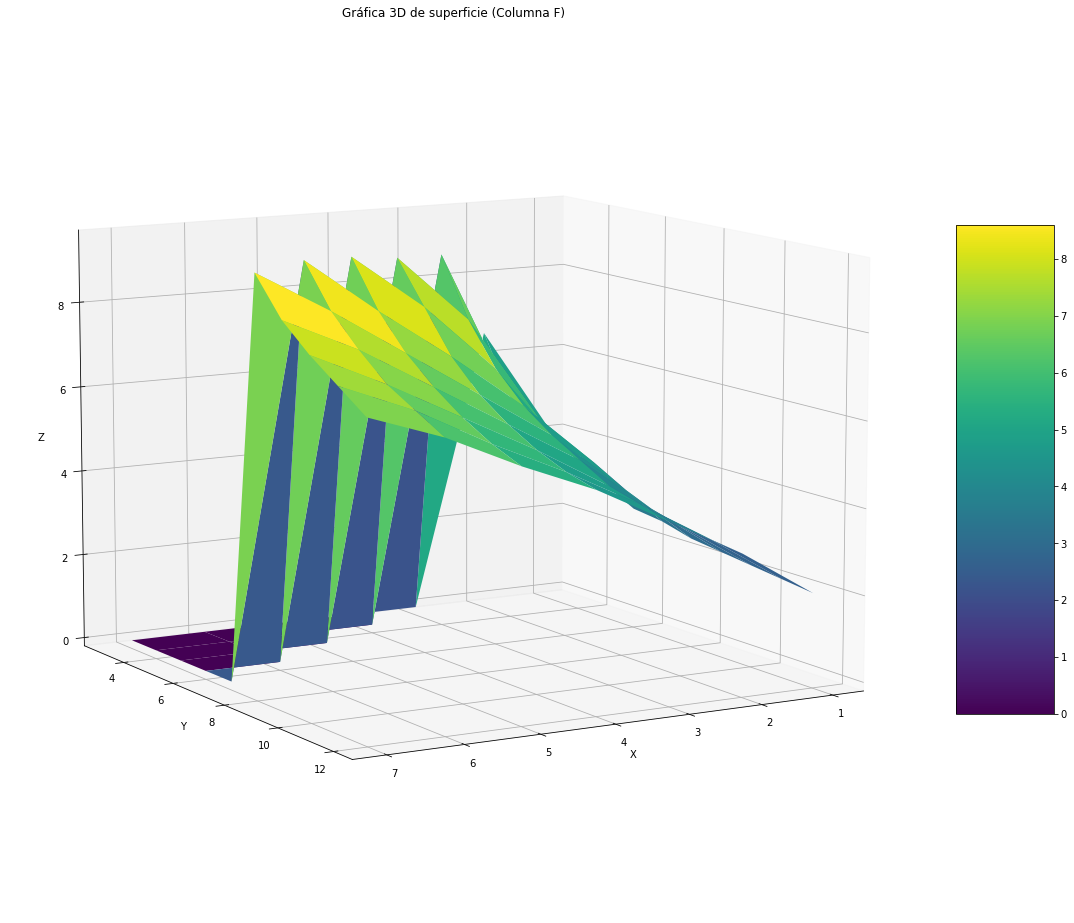

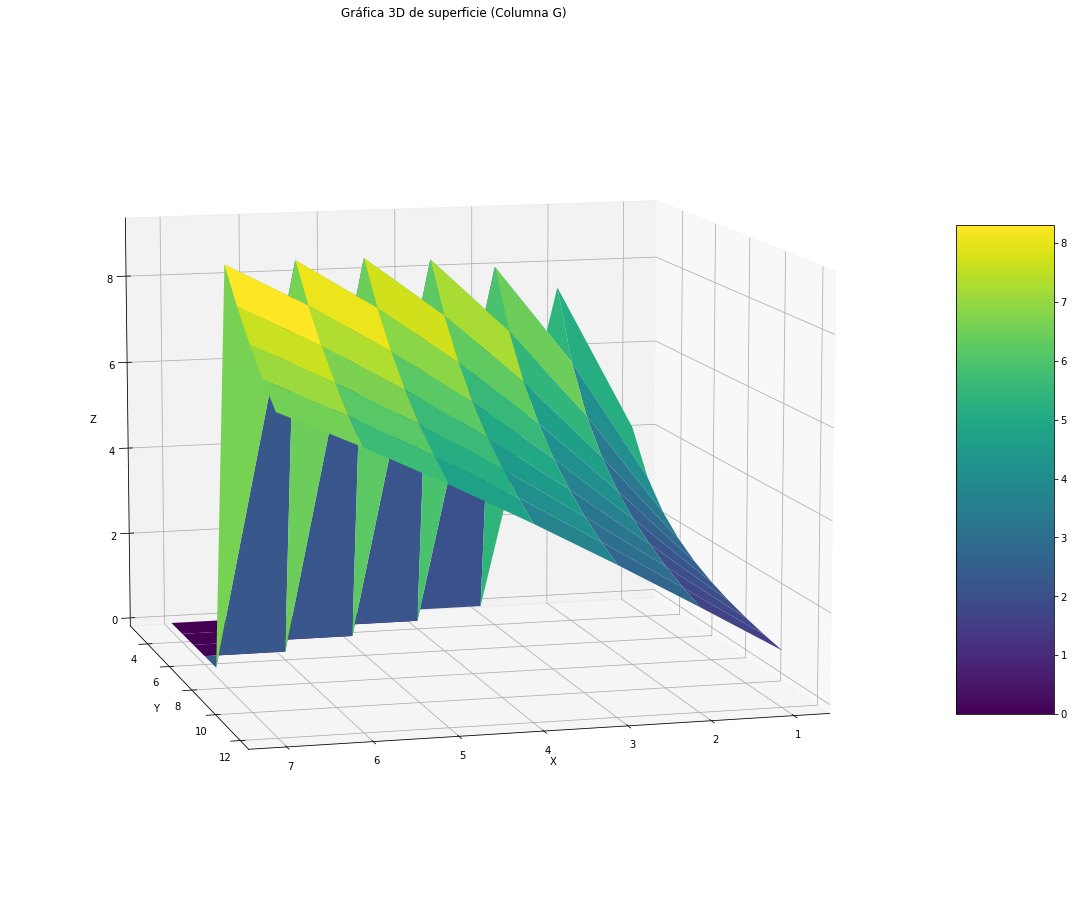

In [4]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Lee los datos de tu archivo Excel y crea un DataFrame
df_f = pd.read_excel("RMS.xlsx", usecols="C:F", skiprows=2, nrows=55, names=["x", "y", "angulo", "muestra"])
df_g = pd.read_excel("RMS.xlsx", usecols="C:G", skiprows=2, nrows=55, names=["x", "y", "angulo", "z", "teorico"])

# Crea una figura 3D para la columna f
fig_f = plt.figure()
ax_f = fig_f.add_subplot(111, projection="3d")
ax_f.set_title("Gráfica 3D de superficie (Columna F)")

# Crea una figura 3D para la columna g
fig_g = plt.figure()
ax_g = fig_g.add_subplot(111, projection="3d")
ax_g.set_title("Gráfica 3D de superficie (Columna G)")

# Crea una malla de valores X y Y
x = np.linspace(df_f["x"].min(), df_f["x"].max(), len(df_f["x"].unique()))
y = np.linspace(df_f["y"].min(), df_f["y"].max(), len(df_f["y"].unique()))
X, Y = np.meshgrid(x, y)

# Crea una matriz Z a partir de los datos de tu archivo Excel para la columna f
Z_f = np.zeros((len(y), len(x)))
for i in range(len(df_f)):
    ix = np.where(x == df_f.loc[i, "x"])[0][0]
    iy = np.where(y == df_f.loc[i, "y"])[0][0]
    Z_f[iy, ix] = df_f.loc[i, "muestra"]

# Crea una matriz Z a partir de los datos de tu archivo Excel para la columna g
Z_g = np.zeros((len(y), len(x)))
for i in range(len(df_g)):
    ix = np.where(x == df_g.loc[i, "x"])[0][0]
    iy = np.where(y == df_g.loc[i, "y"])[0][0]
    Z_g[iy, ix] = df_g.loc[i, "teorico"]

# Define una variable límite para cambiar el color de los valores que la superen
limite = 10

# Crea una gráfica 3D de superficie para la columna f
surf_f = ax_f.plot_surface(X, Y, Z_f, cmap="viridis", edgecolor="none")
ax_f.plot_surface(X, Y, np.where(Z_f > limite, Z_f, np.nan), cmap="Reds", edgecolor="none")
fig_f.colorbar(surf_f, shrink=0.5, aspect=5)

# Crea una gráfica 3D de superficie para la columna g
surf_g = ax_g.plot_surface(X, Y, Z_g, cmap="viridis", edgecolor="none")
ax_g.plot_surface(X, Y, np.where(Z_g > limite, Z_g, np.nan), cmap="Reds", edgecolor="none")
fig_g.colorbar(surf_g, shrink=0.5, aspect=5)

# Para la figura 3D de la columna f
ax_f.set_xlabel("X")
ax_f.set_ylabel("Y")
ax_f.set_zlabel("Z")

# Para la figura 3D de la columna g
ax_g.set_xlabel("X")
ax_g.set_ylabel("Y")
ax_g.set_zlabel("Z")

# Muestra las gráficas
fig_g.set_size_inches(20, 18)
fig_f.set_size_inches(20, 18)
ax_f.view_init(10, 60)
ax_g.view_init(10, 75)
plt.show()
